# 📊 Financial Analysis – Data Cleaning & Exploration
This notebook performs data import, cleaning, and initial exploration for the financial dataset across customers, invoices, products, payments, expenses, assets, liabilities, and equity.

In [1]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Set display options
pd.set_option('display.float_format', lambda x: '%.2f' % x)
sns.set(style='whitegrid')

In [3]:
# Load CSV files
data_path = "Data/"

customers = pd.read_csv(os.path.join(data_path, 'customers.csv'))
products = pd.read_csv(os.path.join(data_path, 'products.csv'))
invoices = pd.read_csv(os.path.join(data_path, 'invoices.csv'))
expenses = pd.read_csv(os.path.join(data_path, 'expenses.csv'))
payments = pd.read_csv(os.path.join(data_path, 'payments.csv'))
date_dim = pd.read_csv(os.path.join(data_path, 'date_dim.csv'))
assets = pd.read_csv(os.path.join(data_path, 'assets.csv'))
liabilities = pd.read_csv(os.path.join(data_path, 'liabilities.csv'))
equity = pd.read_csv(os.path.join(data_path, 'equity.csv'))

## 🧹 Step 1: Data Quality Checks

In [4]:
# Check for nulls
for name, df in zip(['Customers', 'Products', 'Invoices', 'Expenses', 'Payments', 'Assets', 'Liabilities', 'Equity'], 
                    [customers, products, invoices, expenses, payments, assets, liabilities, equity]):
    print(f"{name} - Rows: {df.shape[0]}, Columns: {df.shape[1]}, Missing: {df.isnull().sum().sum()}")

Customers - Rows: 100, Columns: 4, Missing: 0
Products - Rows: 20, Columns: 4, Missing: 0
Invoices - Rows: 1500, Columns: 7, Missing: 0
Expenses - Rows: 180, Columns: 4, Missing: 0
Payments - Rows: 734, Columns: 5, Missing: 0
Assets - Rows: 144, Columns: 3, Missing: 0
Liabilities - Rows: 108, Columns: 3, Missing: 0
Equity - Rows: 72, Columns: 3, Missing: 0


## 📈 Step 2: Revenue and Profit Analysis

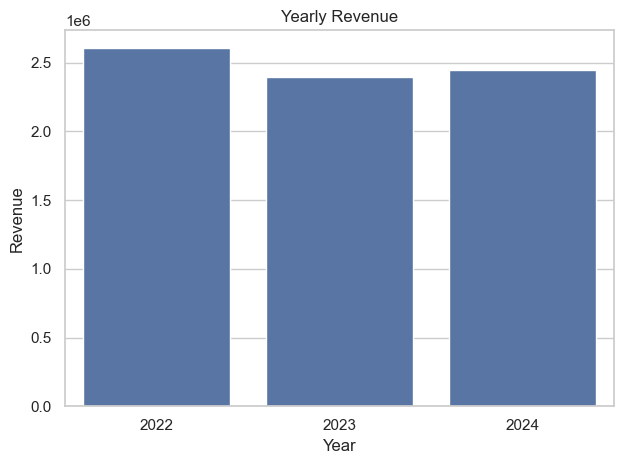

In [ ]:
# Extract revenue by year
invoices['Date'] = pd.to_datetime(invoices['Date'])
invoices['Year'] = invoices['Date'].dt.year

revenue_by_year = invoices.groupby('Year')['Total_Amount'].sum().reset_index()
sns.barplot(x='Year', y='Total_Amount', data=revenue_by_year)
plt.title('Yearly Revenue')
plt.ylabel('Revenue')
plt.xlabel('Year')
plt.tight_layout()
plt.show()

## 💰 Step 3: Expense Analysis by Category 

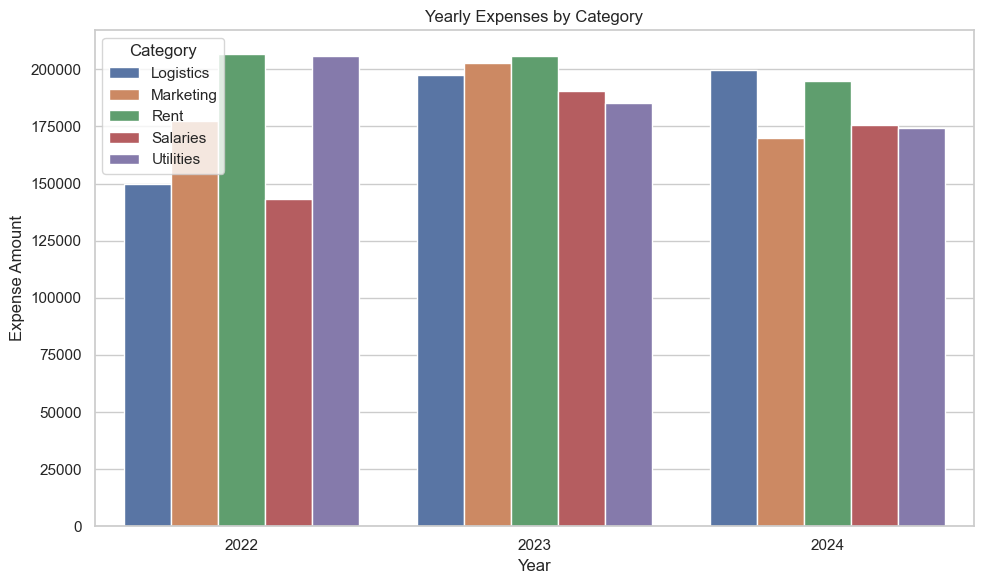

In [6]:
expenses['Date'] = pd.to_datetime(expenses['Date'])
expenses['Year'] = expenses['Date'].dt.year

expense_summary = expenses.groupby(['Year', 'Category'])['Amount'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='Year', y='Amount', hue='Category', data=expense_summary)
plt.title('Yearly Expenses by Category')
plt.ylabel('Expense Amount')
plt.xlabel('Year')
plt.legend(title='Category')
plt.tight_layout()
plt.show()

## 🧾 Step 4: Net Profit Analysis

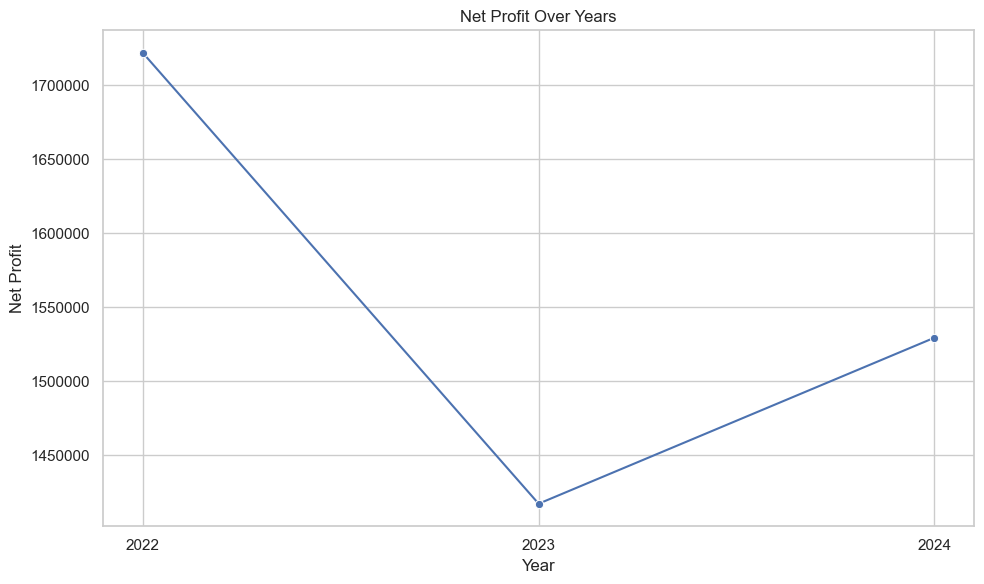

In [38]:
yearly_revenue = invoices.groupby('Year')['Total_Amount'].sum()
yearly_expense = expenses.groupby('Year')['Amount'].sum()

net_profit_df = pd.DataFrame({
    'Revenue': yearly_revenue,
    'Expenses': yearly_expense
})
net_profit_df['Net_Profit'] = net_profit_df['Revenue'] - net_profit_df['Expenses']
net_profit_df.reset_index(inplace=True)

net_profit_df

plt.figure(figsize=(10, 6))
sns.lineplot(data=net_profit_df, x='Year', y='Net_Profit', marker='o')
plt.title('Net Profit Over Years')
plt.xlabel('Year')
plt.ylabel('Net Profit')

# Optional: Format y-axis to plain numbers
plt.ticklabel_format(style='plain', axis='y')  # Removes scientific notation
plt.xticks(net_profit_df['Year'])  # Ensures only full years are shown

plt.grid(True)
plt.tight_layout()
plt.show()

# Observations
    2022:The organization achieved the highest net profit, exceeding 1.7 million, indicating strong operational performance.
    2023: A sharp decline is observed, with net profit dropping to approximately 1.42 million. This marks a 17% decrease, potentially attributable to:
        Increased operating costs and 
        Reduced revenue streams
        Market disruptions or one-time losses
    2024: A partial recovery is noted, as net profit climbs back to around 1.54 million. This reflects improved cost control or revenue stabilization, though full recovery to 2022 levels has not been achieved.

# Insights
    The profit dip in 2023 should be investigated further to pinpoint root causes—whether internal inefficiencies or external market conditions.
    The uptick in 2024 suggests that corrective measures or strategic pivots might be yielding results.
    Continued focus on cost optimization, pricing strategy, and margin improvement is recommended to sustain recovery into 2025 and beyond.

## 🧮 Step 5: Customer Lifetime Value (LTV)

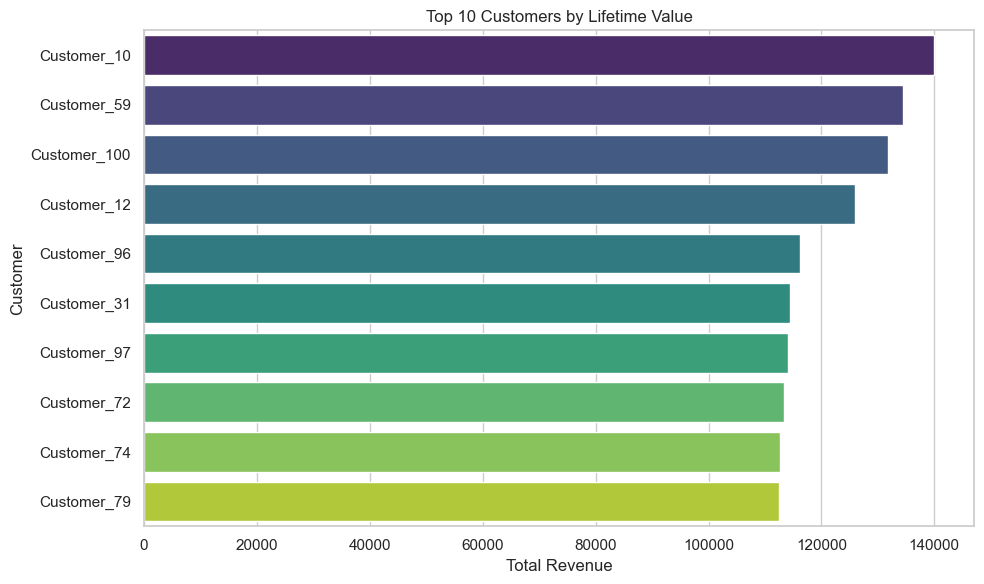

In [25]:
ltv = invoices.groupby('Customer_ID')['Total_Amount'].sum().reset_index()
ltv.columns = ['Customer_ID', 'Customer_LTV']

ltv_merged = pd.merge(ltv, customers, on='Customer_ID')
top_customers = ltv_merged.sort_values(by='Customer_LTV', ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x='Customer_LTV', y='Customer_Name', data=top_customers,hue='Customer_Name', palette='viridis')
plt.title('Top 10 Customers by Lifetime Value')
plt.xlabel('Total Revenue')
plt.ylabel('Customer')
plt.tight_layout()
plt.show()


## 📦 Step 6: Product Sales Analysis

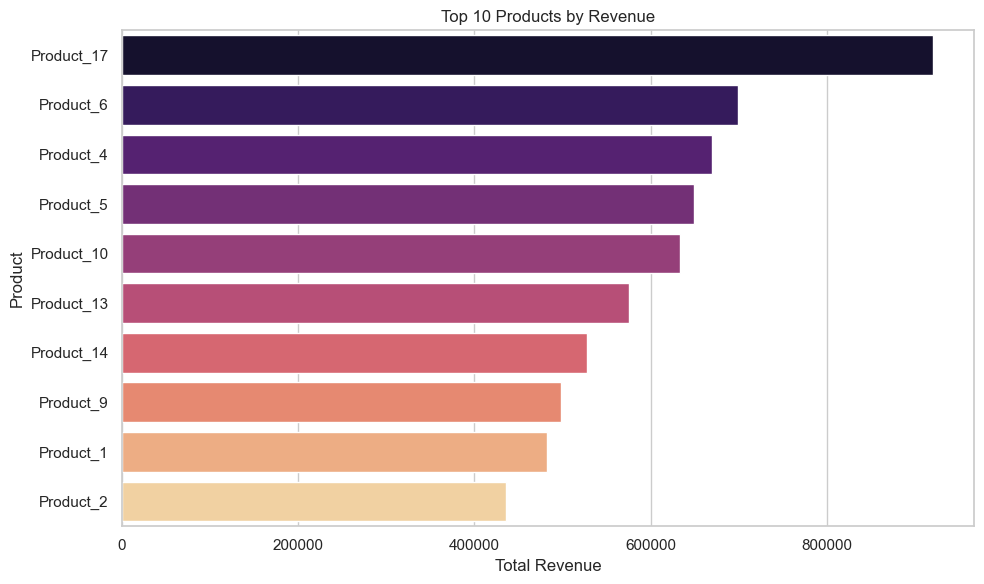

In [21]:
invoice_products = pd.merge(invoices, products, on='Product_ID')
product_sales = invoice_products.groupby('Product_Name')['Total_Amount'].sum().reset_index().sort_values(by='Total_Amount', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='Total_Amount', y='Product_Name', data=product_sales,hue='Product_Name', palette='magma')
plt.title('Top 10 Products by Revenue')
plt.xlabel('Total Revenue')
plt.ylabel('Product')
plt.tight_layout()
plt.show()


## 📉 Step 7: Monthly Revenue and Expense Trend

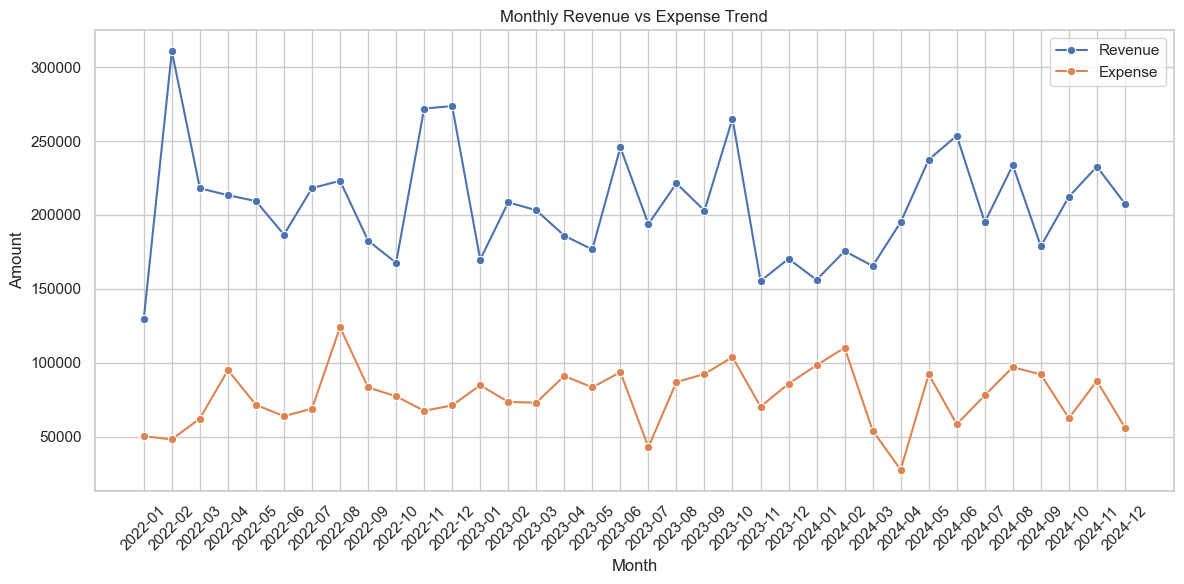

In [18]:
# Step 1: Monthly Revenue
monthly_revenue = invoices.copy()
monthly_revenue['Month'] = monthly_revenue['Date'].dt.to_period('M')
monthly_revenue = monthly_revenue.groupby('Month')['Total_Amount'].sum().reset_index()
monthly_revenue.rename(columns={'Total_Amount': 'Revenue'}, inplace=True)

# Step 2: Monthly Expenses
monthly_expenses = expenses.copy()
monthly_expenses['Month'] = monthly_expenses['Date'].dt.to_period('M')
monthly_expenses = monthly_expenses.groupby('Month')['Amount'].sum().reset_index()
monthly_expenses.rename(columns={'Amount': 'Expense'}, inplace=True)

# Step 3: Merge Revenue & Expense
monthly_summary = pd.merge(monthly_revenue, monthly_expenses, on='Month', how='outer').fillna(0)
monthly_summary['Month'] = monthly_summary['Month'].astype(str)  # Convert Period to string for plotting

# Step 4: Plotting
plt.figure(figsize=(12,6))
sns.lineplot(data=monthly_summary, x='Month', y='Revenue', label='Revenue', marker='o')
sns.lineplot(data=monthly_summary, x='Month', y='Expense', label='Expense', marker='o')
plt.xticks(rotation=45)
plt.title('Monthly Revenue vs Expense Trend')
plt.ylabel('Amount')
plt.xlabel('Month')
plt.legend()
plt.tight_layout()
plt.show()

## 📊 Step 8: Profitability by Product Category

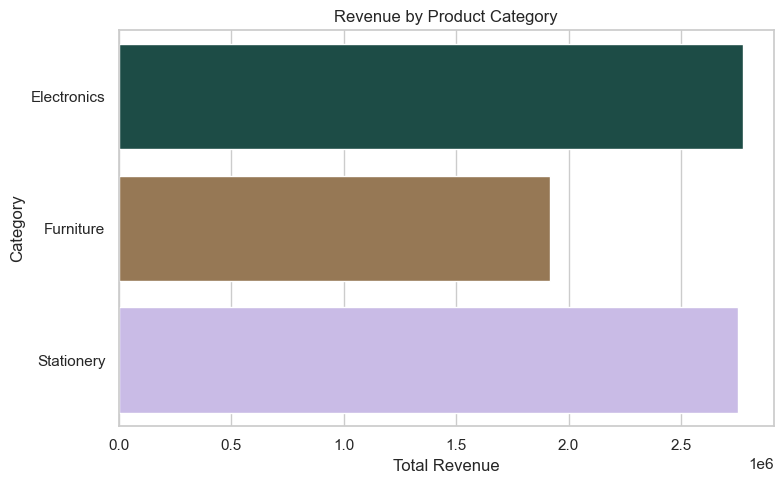

In [20]:
# Merge invoices with products
invoice_prod = pd.merge(invoices, products, on='Product_ID')
invoice_prod['Revenue'] = invoice_prod['Total_Amount']

# Group by category
category_profit = invoice_prod.groupby('Category')['Revenue'].sum().reset_index()

# Plot
plt.figure(figsize=(8,5))
sns.barplot(x='Revenue', y='Category', data=category_profit,hue='Category', palette='cubehelix')
plt.title('Revenue by Product Category')
plt.xlabel('Total Revenue')
plt.ylabel('Category')
plt.tight_layout()
plt.show()

## 🧾 Step 9: Days Outstanding (for Unpaid Invoices)

In [47]:
# Calculate Days Outstanding for unpaid invoices
today = pd.Timestamp.today()
invoices['Date'] = pd.to_datetime(invoices['Date'])
unpaid_invoices = invoices[invoices['Status'] == 'Unpaid'].copy()
unpaid_invoices['Days_Outstanding'] = (today - unpaid_invoices['Date']).dt.days

# Show top overdue invoices
unpaid_invoices[['Invoice_ID', 'Customer_ID', 'Date', 'Total_Amount', 'Days_Outstanding']].sort_values(by='Days_Outstanding', ascending=False).head(10)

,Invoice_ID,Customer_ID,Date,Total_Amount,Days_Outstanding
226,INV00227,CUST083,2022-01-02,1467.80,1310
409,INV00410,CUST075,2022-01-02,3428.28,1310
447,INV00448,CUST082,2022-01-04,5227.04,1308
496,INV00497,CUST070,2022-01-05,6115.97,1307
258,INV00259,CUST078,2022-01-06,614.61,1306
233,INV00234,CUST076,2022-01-06,807.29,1306
271,INV00272,CUST077,2022-01-07,1747.42,1305
270,INV00271,CUST068,2022-01-08,9063.70,1304
187,INV00188,CUST006,2022-01-10,807.29,1302
217,INV00218,CUST018,2022-01-10,1812.74,1302


In [54]:
# Total amount outstanding
outstanding = unpaid_invoices['Total_Amount'].sum().round()
print(f"Total amount outstanding: {outstanding}")

Total amount outstanding: 3813052.0


## 📈 Step 10: Asset to Liability Ratio Over Time

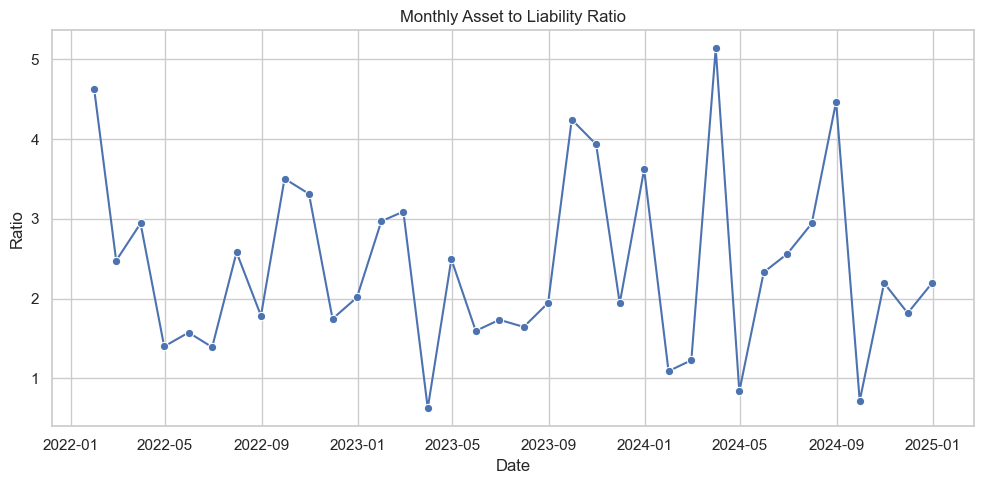

In [16]:
# Convert to datetime
assets['Date'] = pd.to_datetime(assets['Date'])
liabilities['Date'] = pd.to_datetime(liabilities['Date'])

# Summarize monthly totals
assets_monthly = assets.groupby('Date')['Amount'].sum().reset_index()
liabilities_monthly = liabilities.groupby('Date')['Amount'].sum().reset_index()
ratios_df = pd.merge(assets_monthly, liabilities_monthly, on='Date', suffixes=('_Assets', '_Liabilities'))
ratios_df['Asset_Liability_Ratio'] = ratios_df['Amount_Assets'] / ratios_df['Amount_Liabilities']

# Plot ratio
plt.figure(figsize=(10, 5))
sns.lineplot(data=ratios_df, x='Date', y='Asset_Liability_Ratio', marker='o')
plt.title('Monthly Asset to Liability Ratio')
plt.ylabel('Ratio')
plt.tight_layout()
plt.show()


# Key Visual Insights
    #High Volatility observed across months, with the ratio fluctuating between ~0.5 and 5.1.
    #Peak Ratios around early 2022 and mid-2024 indicate strong asset positions relative to liabilities during those periods.
    #Significant Dips were noted in:
    #May 2023 (~0.5) – possible spike in liabilities or drop in assets.
    #May 2024 and September 2024 – may require deeper investigation.
    #Periods with ratios consistently above 2 signal healthier financial standing


# Financial Health Interpretation
| Ratio Level   | Implication                                         |
| ------------- | --------------------------------------------------- |
| **> 2.0**     | Strong asset coverage, low leverage risk.           |
| **1.0 – 2.0** | Acceptable, but warrants monitoring.                |
| **< 1.0**     | Financial stress likely; liabilities exceed assets. |

# Recommendations
    #Investigate months with ratios < 1.5, particularly May 2023 and Sep 2024, to understand underlying causes.
    #Maintain consistent asset growth while managing liabilities to ensure a minimum 2.0 ratio across months.
    #Consider applying a 3-month rolling average to reduce noise and observe true trend directions.

## 🔮 Step 11: Simple Revenue Forecasting (Using Linear Trend)

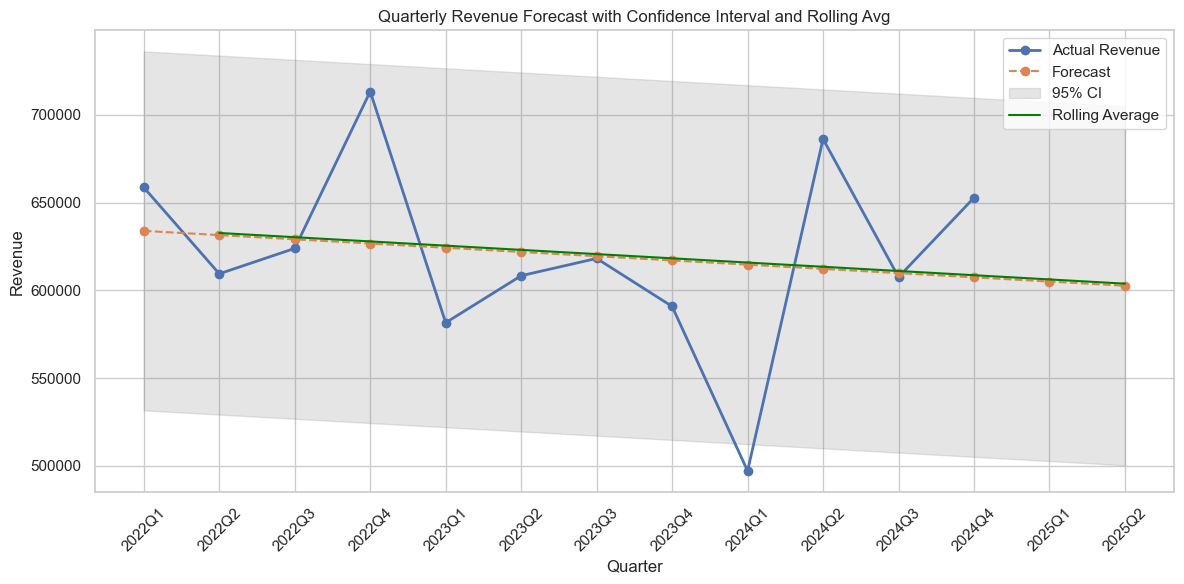

In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

# Step 1: Prepare Quarterly Data
monthly_revenue['Month'] = pd.to_datetime(monthly_revenue['Month'])
monthly_revenue['Quarter'] = monthly_revenue['Month'].dt.to_period('Q')
quarterly_revenue = monthly_revenue.groupby('Quarter')['Revenue'].sum().reset_index()

# Step 2: Format for Regression
quarterly_revenue['Quarter_Str'] = quarterly_revenue['Quarter'].astype(str)
quarterly_revenue['Quarter_Num'] = np.arange(len(quarterly_revenue))

X = quarterly_revenue[['Quarter_Num']]
y = quarterly_revenue['Revenue']

# Step 3: Linear Regression Model
model = LinearRegression()
model.fit(X, y)

# Forecast current + next 2 quarters
future_periods = 2
future_quarters = pd.period_range(start=quarterly_revenue['Quarter'].iloc[-1] + 1, periods=future_periods, freq='Q')
future_nums = np.arange(len(quarterly_revenue), len(quarterly_revenue) + future_periods)

# Combine existing and forecasted
forecasted_revenue = pd.DataFrame({
    'Quarter': list(quarterly_revenue['Quarter']) + list(future_quarters),
    'Quarter_Num': list(quarterly_revenue['Quarter_Num']) + list(future_nums)
})
forecasted_revenue['Forecast'] = model.predict(forecasted_revenue[['Quarter_Num']])

# Step 4: Calculate 95% Confidence Interval (approx.)
y_pred = model.predict(X)
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)
ci = 1.96 * rmse  # 95% confidence interval

forecasted_revenue['Upper_CI'] = forecasted_revenue['Forecast'] + ci
forecasted_revenue['Lower_CI'] = forecasted_revenue['Forecast'] - ci

# Step 5: Rolling Average for smoothing
forecasted_revenue['Rolling_Avg'] = forecasted_revenue['Forecast'].rolling(window=2).mean()

# Step 6: Plotting
plt.figure(figsize=(12, 6))
plt.plot(quarterly_revenue['Quarter_Str'], y, label='Actual Revenue', marker='o', linewidth=2)
plt.plot(forecasted_revenue['Quarter'].astype(str), forecasted_revenue['Forecast'], label='Forecast', linestyle='--', marker='o')
plt.fill_between(forecasted_revenue['Quarter'].astype(str), forecasted_revenue['Lower_CI'], forecasted_revenue['Upper_CI'], color='gray', alpha=0.2, label='95% CI')
plt.plot(forecasted_revenue['Quarter'].astype(str), forecasted_revenue['Rolling_Avg'], label='Rolling Average', linestyle='-', color='green')

plt.title('Quarterly Revenue Forecast with Confidence Interval and Rolling Avg')
plt.xlabel('Quarter')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()


# Key Observations
    #The forecast suggests marginal revenue decline in upcoming quarters.
    #The model reflects limited volatility, evidenced by the tight confidence bands.
    #Rolling averages align closely with forecasts, implying high model consistency
# Suggested Business Actions
    #Monitor Q1 FY2025 actuals closely to validate forecast accuracy.
    #Leverage insights to reassess marketing and sales allocations to prevent forecasted downturn.
    #Consider product or region-level drilldowns to uncover micro-trends behind fluctuations.